<a href="https://colab.research.google.com/github/kamalsnair/Assignment/blob/main/Casestudy_3_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Build a best deep learning classification model. fine tune the parameters. Do necessary preprocessing before building deep learning models

loan_status is your target variable






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('/content/loan-processed.csv')

In [3]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,isd_month,isd_year,loan_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,0.00,171.62,0.0,0.0,0.0,12,2011,Fully Paid
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,0.00,117.08,1.11,119.66,0.0,0.0,0.0,12,2011,Charged Off
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,0.00,649.91,0.0,0.0,0.0,12,2011,Fully Paid
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,16.97,0.00,0.00,357.48,0.0,0.0,0.0,12,2011,Fully Paid
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,0.00,161.03,0.0,0.0,0.0,12,2011,Fully Paid


In [4]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [5]:
data['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4         Fully Paid
            ...     
37539     Fully Paid
37540     Fully Paid
37541     Fully Paid
37542     Fully Paid
37543     Fully Paid
Name: loan_status, Length: 37544, dtype: object

In [6]:
data.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   47
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
tax_lien

filling the missing values

In [7]:
data['revol_util'].describe()

count    37497.000000
mean        48.861742
std         28.341493
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

(array([4233., 3205., 3598., 3890., 4110., 4078., 4023., 3809., 3509.,
        3042.]),
 array([ 0.  ,  9.99, 19.98, 29.97, 39.96, 49.95, 59.94, 69.93, 79.92,
        89.91, 99.9 ]),
 <a list of 10 Patch objects>)

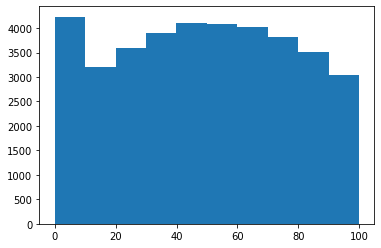

In [8]:
plt.hist(data['revol_util'])

In [9]:
data['revol_util'].mean()

48.86174200602716

In [10]:
mean_revol_util=data['revol_util'].mean()

In [11]:
data['revol_util'].fillna(mean_revol_util)

0        83.7
1         9.4
2        98.5
3        21.0
4        28.3
         ... 
37539    13.1
37540    26.9
37541    19.4
37542     0.7
37543    51.5
Name: revol_util, Length: 37544, dtype: float64

In [12]:
data['revol_util']=data['revol_util'].fillna(mean_revol_util)

In [13]:
data['chargeoff_within_12_mths'].describe()

count    37488.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [14]:
data.drop(['chargeoff_within_12_mths'],axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,tax_liens,isd_month,isd_year,loan_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,863.16,0.00,0.00,0.00,171.62,0.0,0.0,12,2011,Fully Paid
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,435.17,0.00,117.08,1.11,119.66,0.0,0.0,12,2011,Charged Off
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,605.67,0.00,0.00,0.00,649.91,0.0,0.0,12,2011,Fully Paid
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,2214.92,16.97,0.00,0.00,357.48,0.0,0.0,12,2011,Fully Paid
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,632.21,0.00,0.00,0.00,161.03,0.0,0.0,12,2011,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,MORTGAGE,...,322.97,0.00,0.00,0.00,80.90,NaN,NaN,7,2007,Fully Paid
37540,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,RENT,...,1413.49,0.00,0.00,0.00,281.94,NaN,NaN,7,2007,Fully Paid
37541,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,MORTGAGE,...,272.16,0.00,0.00,0.00,0.00,NaN,NaN,7,2007,Fully Paid
37542,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,MORTGAGE,...,174.20,0.00,0.00,0.00,0.00,NaN,NaN,7,2007,Fully Paid


In [15]:
data=data.drop(['chargeoff_within_12_mths','sub_grade'],axis=1)

In [16]:
data.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
purpose                      0
dti                          0
delinq_2yrs                  0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
pub_rec_bankruptcies       697
tax_liens                   39
isd_month                    0
isd_year                     0
loan_sta

In [17]:
data['pub_rec_bankruptcies'].describe()

count    36847.000000
mean         0.041794
std          0.200799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

(array([3.5312e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.5300e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

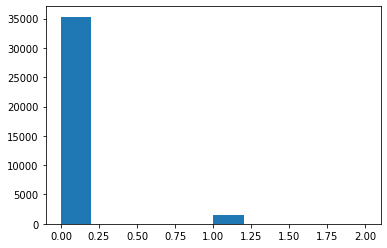

In [18]:
plt.hist(data['pub_rec_bankruptcies'])

In [19]:
data['pub_rec_bankruptcies'].mode()[0]

0.0

In [20]:
mode_pub_rec_bankruptcies=data['pub_rec_bankruptcies'].mode()[0]

In [21]:
data['pub_rec_bankruptcies']=data['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies)

In [22]:
data['tax_liens'].describe()

count    37505.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [23]:
data=data.drop(['tax_liens'],axis=1)

In [24]:
data.isna().sum()         ## No data is missing

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [25]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  object 
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   emp_length               37544 non-null  int64  
 8   home_ownership           37544 non-null  object 
 9   annual_inc               37544 non-null  float64
 10  verification_status      37544 non-null  object 
 11  purpose                  37544 non-null  object 
 12  dti                      37544 non-null  float64
 13  delinq_2yrs              37544 non-null  int64  
 14  inq_last_6mths        

In [27]:
data['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         36 months
            ...    
37539     36 months
37540     36 months
37541     36 months
37542     36 months
37543     36 months
Name: term, Length: 37544, dtype: object

In [28]:
data['term']=data['term'].str.replace('months',"")

In [29]:
data['term']=data['term'].astype(float)

In [30]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [31]:
grade_M={'A':1,'B':1,'C':3,'D':4,'E':5,'F':6,'G':7}

In [32]:
data['grade'].map(grade_M)

0        1
1        3
2        3
3        3
4        1
        ..
37539    1
37540    3
37541    1
37542    1
37543    5
Name: grade, Length: 37544, dtype: int64

In [33]:
data['grade']=data['grade'].map(grade_M)

In [34]:
data['grade']=data['grade'].astype(int)

In [35]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [36]:
pd.get_dummies(data['home_ownership'])

,MORTGAGE,NONE,OTHER,OWN,RENT
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
37539,1,0,0,0,0
37540,0,0,0,0,1
37541,1,0,0,0,0
37542,1,0,0,0,0


In [37]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [38]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [39]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [40]:
data['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [41]:
data['dti'].unique()

array([27.65,  1.  ,  8.72, ...,  0.05,  0.12, 25.43])

In [42]:
x=data.drop(['emp_length','dti','open_acc','loan_status','home_ownership','verification_status','purpose',],axis=1)

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  float64
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  int64  
 7   annual_inc               37544 non-null  float64
 8   delinq_2yrs              37544 non-null  int64  
 9   inq_last_6mths           37544 non-null  int64  
 10  pub_rec                  37544 non-null  int64  
 11  revol_bal                37544 non-null  int64  
 12  revol_util               37544 non-null  float64
 13  total_acc                37544 non-null  int64  
 14  total_pymnt           

In [44]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [45]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [46]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [47]:
y=data['loan_status']

In [48]:
x=pd.get_dummies(x)

In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  float64
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  int64  
 7   annual_inc               37544 non-null  float64
 8   delinq_2yrs              37544 non-null  int64  
 9   inq_last_6mths           37544 non-null  int64  
 10  pub_rec                  37544 non-null  int64  
 11  revol_bal                37544 non-null  int64  
 12  revol_util               37544 non-null  float64
 13  total_acc                37544 non-null  int64  
 14  total_pymnt           

In [50]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [51]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [52]:
loan_status={'Fully Paid':0,'Charged Off':1}

In [53]:
data['loan_status']=data['loan_status'].map(loan_status)

In [54]:
y=data['loan_status']

splitting the data into train and test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x.shape

(37544, 25)

In [57]:
y.shape

(37544,)

In [58]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state=123)

applying linear regression on the train data and predicting using x_test

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(x_test)

calculating the mean squared error and r squared values

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
mean_squared_error(y_test,y_pred)

0.049715371923717354

In [65]:
r2_score(y_test,y_pred)

0.6008723393512865

## Lasso regression


In [66]:
# Import the lasso regressor class 
from sklearn.linear_model import Lasso
# Create an instance of the class
lasso = Lasso(alpha=10)
# Use the fit method on training data
lasso.fit(x_train, y_train)
# Use the predict method on test data
y_pred_lasso = lasso.predict(x_test)

## calculate the mean square error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('{:0.2f}'.format(mse_lasso))

0.05


In [67]:
r2_score(y_test, y_pred_lasso)

0.5899776465814609

In [68]:
# Import the lasso regressor class 
from sklearn.linear_model import Ridge
# Create an instance of the class
ridge = Ridge()
# Use the fit method on training data
ridge.fit(x_train, y_train)
# Use the predict method on test data
y_pred_ridge = ridge.predict(x_test)

## calculate the mean square error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('{:0.2f}'.format(mse_ridge))

0.05


In [69]:
r2_score(y_test, y_pred_ridge)

0.600883573354266

KNN Regression

In [70]:
# Import the knn regressor class 
from sklearn.neighbors import KNeighborsRegressor
# Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=12)
# Use the fit method on training data
knn.fit(x_train, y_train)
# Use the predict method on test data
y_pred_knn = knn.predict(x_test)
mean_squared_error(y_test, y_pred_knn)

0.037543836285346466

In [71]:
r2_score(y_test, y_pred_knn)

0.6985885256708713

In [72]:
#calculate the mean square error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print('{:0.2f}'.format(mse_knn))

0.04


Decision Tree regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor
# Create an instance of the class
dt_reg = DecisionTreeRegressor(random_state=45,max_depth=15)
# Use the fit method on training data
dt_reg.fit(x_train, y_train)
# Use the predict method on test data
y_pred_dt = dt_reg.predict(x_test)

## calculate the mean square error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('{:0.2f}'.format(mse_dt))

0.01


In [74]:
r2_score(y_test, y_pred_dt)

0.9581349094428957

In [75]:
dt_reg = DecisionTreeRegressor(max_depth=16)
from sklearn.ensemble import BaggingRegressor
bg_regr = BaggingRegressor(base_estimator=dt_reg, n_estimators=500, random_state=123)
bg_regr.fit(x_train,y_train)
y_pred_bg = bg_regr.predict(x_test)
## calculate the mean square error
mse_bg = mean_squared_error(y_test, y_pred_bg)
print('{:0.2f}'.format(mse_bg))

0.00


random Forest regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the class-
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=500)
# Use the fit method on training data
rf_reg.fit(x_train, y_train)
# Use the predict method on test data
y_pred_rf = rf_reg.predict(x_test)

## calculate the mean square error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('{:0.2f}'.format(mse_rf))

0.00


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [78]:
x_train.shape, y_train.shape

((30035, 25), (30035,))

In [79]:
nn_seq = Sequential()
nn_seq.add(Dense(32, activation = "relu",input_shape = (25,)))
nn_seq.add(Dense(16, activation = "relu"))
nn_seq.add(Dense(8, activation = "relu"))
nn_seq.add(Dense(1, activation = None))   ### regression problem 
nn_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [80]:
nn_seq.compile(optimizer="adam",metrics = ["mse"], loss = "mean_squared_error")

In [81]:
epochs = 10
batch_size = 64
nn_seq.fit(x_train, y_train , epochs = epochs, batch_size= batch_size)

Epoch 1/10
470/470 [==============================] - 2s 3ms/step - loss: 519012.7812 - mse: 519012.7812
Epoch 2/10
470/470 [==============================] - 1s 3ms/step - loss: 5142.2720 - mse: 5142.2720
Epoch 3/10
470/470 [==============================] - 1s 3ms/step - loss: 19.7099 - mse: 19.7099
Epoch 4/10
470/470 [==============================] - 1s 2ms/step - loss: 0.1556 - mse: 0.1556
Epoch 5/10
470/470 [==============================] - 1s 2ms/step - loss: 0.1570 - mse: 0.1570
Epoch 6/10
470/470 [==============================] - 1s 2ms/step - loss: 0.1606 - mse: 0.1606
Epoch 7/10
470/470 [==============================] - 1s 2ms/step - loss: 0.1761 - mse: 0.1761
Epoch 8/10
470/470 [==============================] - 1s 2ms/step - loss: 0.1594 - mse: 0.1594
Epoch 9/10
470/470 [==============================] - 1s 2ms/step - loss: 0.1687 - mse: 0.1687
Epoch 10/10
470/470 [==============================] - 1s 2ms/step - loss: 0.1990 - mse: 0.1990


In [82]:
y_pred = nn_seq.predict(x_test)

235/235 [==============================] - 0s 1ms/step


In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y_test, y_pred) 

0.1436619038680757

Model2

6 hidden layers, 64-neurons, epcohs = 50

In [85]:
nn_reg2 = Sequential()
nn_reg2.add(Dense(64, activation = "relu", input_shape = (25,)))
nn_reg2.add(Dense(64, activation = "relu"))
nn_reg2.add(Dense(64, activation = "relu"))
nn_reg2.add(Dense(64, activation = "relu"))
nn_reg2.add(Dense(64, activation = "relu"))
nn_reg2.add(Dense(64, activation = "relu"))
nn_reg2.add(Dense(1, activation = None))
nn_reg2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1664      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                

In [86]:
nn_reg2.compile(optimizer="adam", loss = "mean_squared_error",metrics = ["mse"])

In [87]:
history1 = nn_reg2.fit(x_train , y_train , epochs = 50, batch_size = 64,
           validation_split = 0.1)

Epoch 1/50
423/423 [==============================] - 3s 5ms/step - loss: 11650.2852 - mse: 11650.2852 - val_loss: 1309.9055 - val_mse: 1309.9055
Epoch 2/50
423/423 [==============================] - 2s 4ms/step - loss: 7096.5508 - mse: 7096.5508 - val_loss: 460.6524 - val_mse: 460.6524
Epoch 3/50
423/423 [==============================] - 2s 4ms/step - loss: 232.4824 - mse: 232.4824 - val_loss: 33.1676 - val_mse: 33.1676
Epoch 4/50
423/423 [==============================] - 2s 4ms/step - loss: 2289.9924 - mse: 2289.9924 - val_loss: 91.6174 - val_mse: 91.6174
Epoch 5/50
423/423 [==============================] - 2s 4ms/step - loss: 461.9051 - mse: 461.9051 - val_loss: 26.1246 - val_mse: 26.1246
Epoch 6/50
423/423 [==============================] - 2s 4ms/step - loss: 79.8897 - mse: 79.8897 - val_loss: 13.5064 - val_mse: 13.5064
Epoch 7/50
423/423 [==============================] - 1s 3ms/step - loss: 25.0611 - mse: 25.0611 - val_loss: 7.9308 - val_mse: 7.9308
Epoch 8/50
423/423 [======

In [88]:
y_pred = nn_reg2.predict(x_test)

235/235 [==============================] - 0s 2ms/step


In [89]:
mean_squared_error(y_test, y_pred)

0.12667554451276633

In [90]:
history1.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [91]:
import matplotlib.pyplot as plt

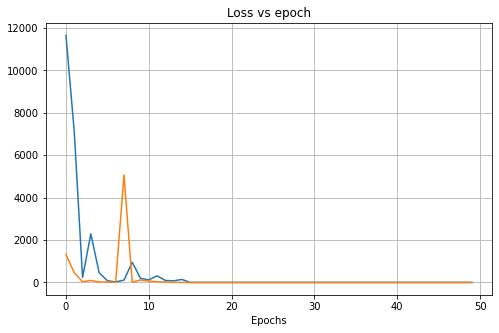

In [92]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(history1.history['loss'], label = "Training loss")
ax.plot(history1.history['val_loss'], label = "validation loss")
ax.set_title("Loss vs epoch")
ax.set_xlabel("Epochs")
ax.grid()
plt.show()

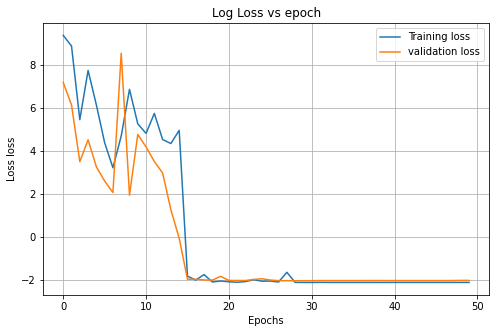

In [93]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['loss']), label = "Training loss")
ax.plot(np.log(history1.history['val_loss']), label = "validation loss")
ax.set_title("Log Loss vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss loss")
ax.legend()
ax.grid()
plt.show()

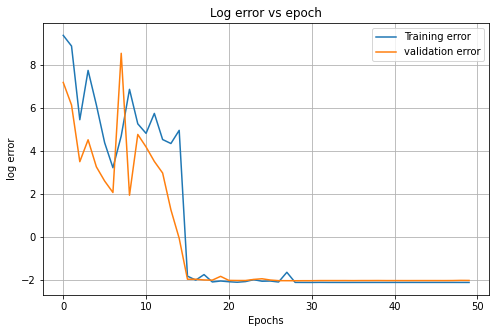

In [94]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['mse']), label = "Training error")
ax.plot(np.log(history1.history['val_mse']), label = "validation error")
ax.set_title("Log error vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("log error")
ax.legend()
ax.grid()
plt.show()

In [95]:
from tensorflow.keras.callbacks import EarlyStopping 

In [96]:
early_stop=EarlyStopping(monitor='val_mse',min_delta=5,patience=20,verbose=1,mode='auto')

In [97]:
nn_reg3 = Sequential()
nn_reg3.add(Dense(128, activation = "relu", input_shape = (25,)))
nn_reg3.add(Dense(128, activation = "relu"))
nn_reg3.add(Dense(128, activation = "relu"))
nn_reg3.add(Dense(64, activation = "relu"))
nn_reg3.add(Dense(64, activation = "relu"))
nn_reg3.add(Dense(64, activation = "relu"))
nn_reg3.add(Dense(1, activation = None))
nn_reg3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               3328      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [98]:
nn_reg3.compile(optimizer="adam", loss = "mean_squared_error",metrics = ["mse"])

In [99]:
history3=nn_reg3.fit(x_train,y_train,epochs=200,batch_size=64,validation_split=0.1,callbacks=[early_stop])

Epoch 1/200
423/423 [==============================] - 3s 5ms/step - loss: 32909.5039 - mse: 32909.5039 - val_loss: 84949.9141 - val_mse: 84949.9141
Epoch 2/200
423/423 [==============================] - 2s 5ms/step - loss: 1740.2319 - mse: 1740.2319 - val_loss: 751.9728 - val_mse: 751.9728
Epoch 3/200
423/423 [==============================] - 2s 5ms/step - loss: 1327.7448 - mse: 1327.7448 - val_loss: 53.0228 - val_mse: 53.0228
Epoch 4/200
423/423 [==============================] - 2s 4ms/step - loss: 1093.8685 - mse: 1093.8685 - val_loss: 28.0768 - val_mse: 28.0768
Epoch 5/200
423/423 [==============================] - 2s 5ms/step - loss: 334.8243 - mse: 334.8243 - val_loss: 16.2943 - val_mse: 16.2943
Epoch 6/200
423/423 [==============================] - 2s 5ms/step - loss: 50.9016 - mse: 50.9016 - val_loss: 301.3561 - val_mse: 301.3561
Epoch 7/200
423/423 [==============================] - 2s 5ms/step - loss: 86.4743 - mse: 86.4743 - val_loss: 0.6879 - val_mse: 0.6879
Epoch 8/200
4

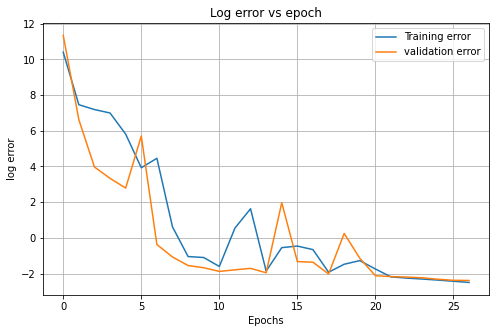

In [100]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history3.history['mse']), label = "Training error")
ax.plot(np.log(history3.history['val_mse']), label = "validation error")
ax.set_title("Log error vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("log error")
ax.legend()
ax.grid()
plt.show()

In [101]:
y_pred=nn_reg3.predict(x_test)
mean_squared_error(y_test,y_pred)

235/235 [==============================] - 1s 2ms/step


0.08811135330876038

In [102]:
from tensorflow.keras.layers import Dropout

In [103]:
nn_reg4 = Sequential()
nn_reg4.add(Dense(128, activation = "relu", input_shape = (25,)))
nn_reg4.add(Dropout(rate=0.2))

nn_reg4.add(Dense(128, activation = "relu"))
nn_reg4.add(Dropout(rate=0.2))

nn_reg4.add(Dense(128, activation = "relu"))
nn_reg4.add(Dropout(rate=0.2))

nn_reg4.add(Dense(64, activation = "relu"))
nn_reg4.add(Dropout(rate=0.2))

nn_reg4.add(Dense(64, activation = "relu"))
nn_reg4.add(Dropout(rate=0.1))

nn_reg4.add(Dense(64, activation = "relu"))
nn_reg4.add(Dropout(rate=0.1))

nn_reg4.add(Dense(1, activation = None))
nn_reg4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               3328      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)               

In [104]:
nn_reg4.compile(optimizer="adam", loss = "mean_squared_error",metrics = ["mse"])

In [105]:
early_stop=EarlyStopping(monitor='val_mse',min_delta=5,patience=20,verbose=1,mode='auto')

In [106]:
history4=nn_reg4.fit(x_train,y_train,epochs=200,batch_size=64,validation_split=0.1,callbacks=[early_stop])



Epoch 1/200
423/423 [==============================] - 3s 6ms/step - loss: 294347.8438 - mse: 294347.8438 - val_loss: 1437.8948 - val_mse: 1437.8948
Epoch 2/200
423/423 [==============================] - 2s 5ms/step - loss: 25402.4102 - mse: 25402.4102 - val_loss: 0.1855 - val_mse: 0.1855
Epoch 3/200
423/423 [==============================] - 2s 5ms/step - loss: 21446.2246 - mse: 21446.2246 - val_loss: 0.1872 - val_mse: 0.1872
Epoch 4/200
423/423 [==============================] - 2s 6ms/step - loss: 1102.2114 - mse: 1102.2114 - val_loss: 0.1856 - val_mse: 0.1856
Epoch 5/200
423/423 [==============================] - 2s 5ms/step - loss: 192.2780 - mse: 192.2780 - val_loss: 0.1816 - val_mse: 0.1816
Epoch 6/200
423/423 [==============================] - 2s 5ms/step - loss: 111.7328 - mse: 111.7328 - val_loss: 0.1787 - val_mse: 0.1787
Epoch 7/200
423/423 [==============================] - 2s 5ms/step - loss: 83.3705 - mse: 83.3705 - val_loss: 0.1749 - val_mse: 0.1749
Epoch 8/200
423/423 [

In [107]:
nn_reg5 = Sequential()
nn_reg5.add(Dense(128, activation = "relu", input_shape = (25,)))
nn_reg5.add(Dropout(rate=0.1))

nn_reg5.add(Dense(128, activation = "relu"))
nn_reg5.add(Dropout(rate=0.1))

nn_reg5.add(Dense(128, activation = "relu"))
nn_reg5.add(Dropout(rate=0.1))

nn_reg5.add(Dense(64, activation = "relu"))
nn_reg5.add(Dropout(rate=0.1))

nn_reg5.add(Dense(64, activation = "relu"))
nn_reg5.add(Dropout(rate=0.1))

nn_reg5.add(Dense(64, activation = "relu"))
nn_reg5.add(Dropout(rate=0.1))

nn_reg5.add(Dense(1, activation = None))
nn_reg5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               3328      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)               

In [108]:
nn_reg5.compile(optimizer="adam", loss = "mean_squared_error",metrics = ["mse"])

In [109]:
early_stop=EarlyStopping(monitor='val_mse',min_delta=5,patience=20,verbose=1,mode='auto')

In [110]:
history5=nn_reg5.fit(x_train,y_train,epochs=75,batch_size=64,validation_split=0.1,callbacks=[early_stop])

Epoch 1/75
423/423 [==============================] - 3s 6ms/step - loss: 45885.4766 - mse: 45885.4766 - val_loss: 0.1695 - val_mse: 0.1695
Epoch 2/75
423/423 [==============================] - 2s 6ms/step - loss: 1033.4916 - mse: 1033.4916 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 3/75
423/423 [==============================] - 2s 6ms/step - loss: 131.7369 - mse: 131.7369 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 4/75
423/423 [==============================] - 2s 5ms/step - loss: 55.5328 - mse: 55.5328 - val_loss: 0.1563 - val_mse: 0.1563
Epoch 5/75
423/423 [==============================] - 2s 6ms/step - loss: 15.9855 - mse: 15.9855 - val_loss: 0.1550 - val_mse: 0.1550
Epoch 6/75
423/423 [==============================] - 2s 5ms/step - loss: 16.6281 - mse: 16.6281 - val_loss: 0.1533 - val_mse: 0.1533
Epoch 7/75
423/423 [==============================] - 2s 5ms/step - loss: 9.4849 - mse: 9.4849 - val_loss: 0.1516 - val_mse: 0.1516
Epoch 8/75
423/423 [==============================] 